In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [3]:
ticker = "MSFT"

data = yf.download(ticker, start="2021-06-01", end="2025-01-01")
data = data[['Close']]

data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,MSFT
Date,
2021-06-01,239.764816
2021-06-02,239.667908
2021-06-03,238.126984
2021-06-04,243.050171
2021-06-07,245.977005
...,...
2024-12-24,438.450836
2024-12-26,437.233276


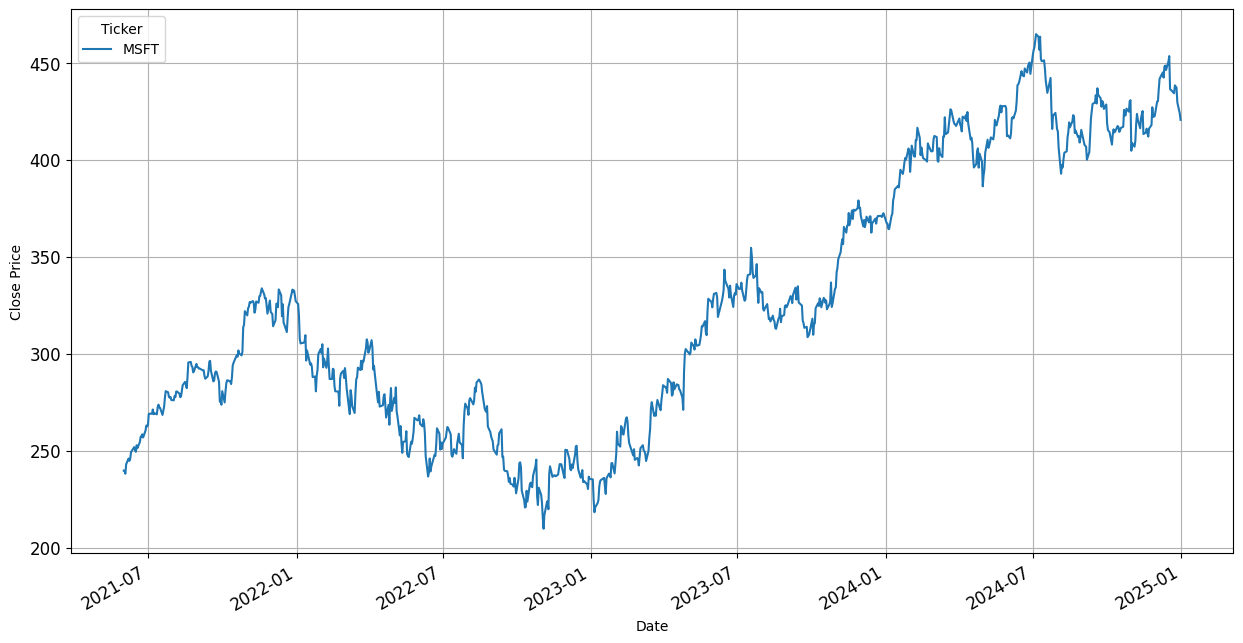

In [4]:
data['Close'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Close Price')
plt.show()

Simple Moving Averages

In [5]:
short_window = 50
long_window = 200

data['EMA50'] = data['Close'].ewm(span=short_window).mean()

data['EMA200'] = data['Close'].ewm(span=long_window).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

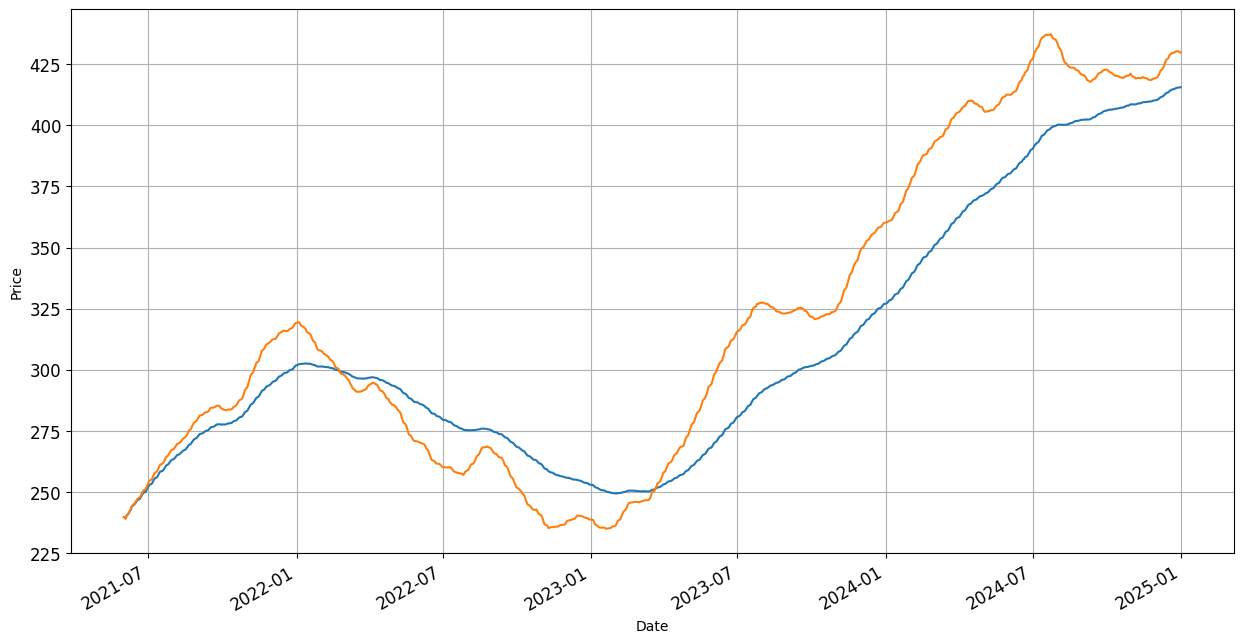

In [7]:
data['EMA200'].plot(figsize=(15,8), fontsize=12)
data['EMA50'].plot(figsize=(15,8), fontsize=12)
plt.grid()
plt.ylabel('Price')
plt.show

Buy and Sell Signals

In [18]:
data['Signal'] = 0  
data['Signal'] = np.where(data['EMA50'] > data['EMA200'], 1, 0) 

data['Position'] = data['Signal'].diff()

data.head(10)

Price,Close,EMA50,EMA200,Signal,Position
Ticker,MSFT,,,,
Date,,,,,
2021-06-01,239.764816,239.764816,239.764816,0,NaN
2021-06-02,239.667908,239.715393,239.716120,0,0.0
2021-06-03,238.126984,239.164606,239.181102,0,0.0
2021-06-04,243.050171,240.195042,240.162926,1,1.0
2021-06-07,245.977005,241.445758,241.349114,1,0.0
2021-06-08,244.775238,242.057611,241.934505,1,0.0
2021-06-09,245.763809,242.652675,242.498096,1,0.0
2021-06-10,249.301086,243.604626,243.378529,1,0.0


Plotting the graph

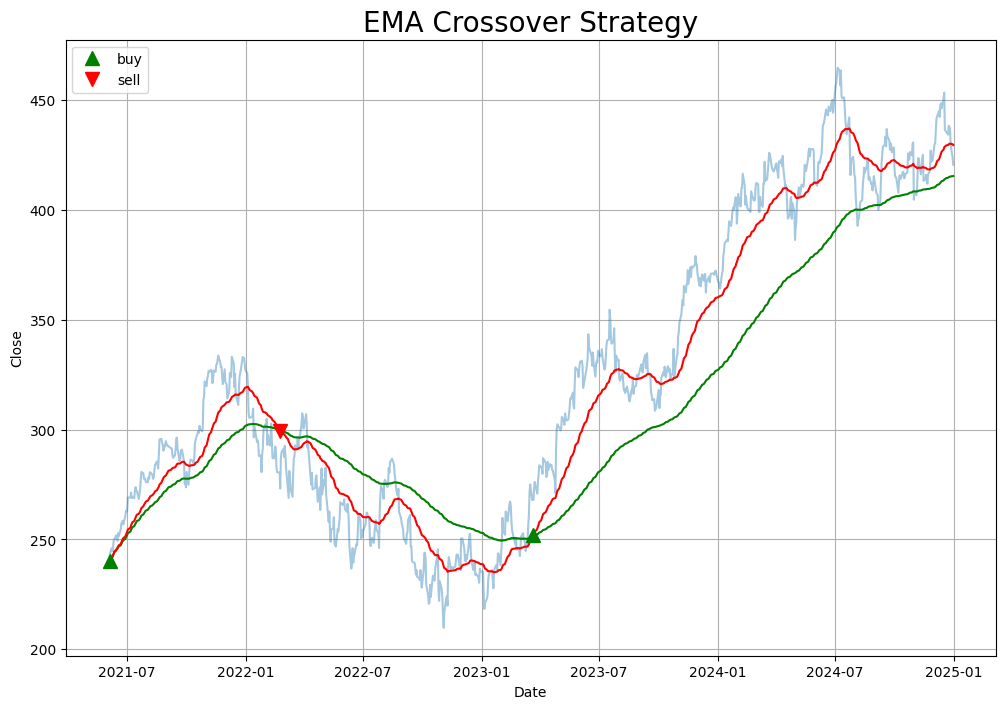

In [20]:
plt.figure(figsize=(12,8))

plt.plot(data['Close'], alpha=0.4)
plt.plot(data['EMA200'],color='g')
plt.plot(data['EMA50'], color='r')


# plot 'buy' signals
plt.plot(data[data['Position'] == 1].index, 
         data['EMA50'][data['Position'] == 1], 
         '^', markersize = 10, color = 'g', alpha = 1, label = 'buy')

# plot 'sell' signals
plt.plot(data[data['Position'] == -1].index, 
         data['EMA50'][data['Position'] == -1], 
         'v', markersize = 10, color = 'r', alpha = 1, label = 'sell')
plt.ylabel('Close', fontsize = 10 )
plt.xlabel('Date', fontsize = 10 )
plt.title('EMA Crossover Strategy', fontsize = 20)
plt.legend()
plt.grid()
plt.show()